# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [1]:
import sqlite3
connection = sqlite3.connect('superhero_db.sqlite')
cursor = connection.cursor()
# heroes table
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  power TEXT NOT NULL,
  team TEXT NOT NULL
)
''')

# villains table
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  evil_plan TEXT NOT NULL
)
''')

# battles table that references hero and villain ids
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  hero_id INTEGER,
  villain_id INTEGER,
  outcome TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id),
  FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')
connection.commit()
cursor.close()


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [2]:
import pandas as pd
df_battles = pd.read_csv('battles.csv') # read battles.csv and convert to sql
df_battles.to_sql('battles', connection, if_exists='replace', index=False)
df_heroes = pd.read_csv('heroes.csv') # read heroes.csv and convert to sql
df_heroes.to_sql('heroes', connection, if_exists='replace', index=False)
df_villains = pd.read_csv('villains.csv') # read villains.csv and convert to sql
df_villains.to_sql('villains', connection, if_exists='replace', index=False)

cursor = connection.cursor()
cursor.execute("SELECT * FROM battles")
rows = cursor.fetchall()

# display battles data
print("battles data:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM heroes")
rows = cursor.fetchall()

# display heroes data
print("heroes data:")
for row in rows:
    print(row)

cursor.execute("SELECT * FROM villains")
rows = cursor.fetchall()

# display villains data
print("villains data:")
for row in rows:
    print(row)

connection.commit()
cursor.close()

battles data:
(1, 1, 10, 'Villain Wins')
(2, 9, 3, 'Hero Wins')
(3, 8, 1, 'Draw')
(4, 5, 4, 'Villain Wins')
(5, 1, 7, 'Hero Wins')
(6, 2, 8, 'Villain Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(10, 3, 1, 'Draw')
(11, 1, 8, 'Villain Wins')
(12, 2, 1, 'Draw')
(13, 8, 9, 'Hero Wins')
(14, 8, 1, 'Draw')
(15, 6, 10, 'Draw')
(16, 1, 1, 'Villain Wins')
(17, 8, 3, 'Draw')
(18, 6, 3, 'Villain Wins')
(19, 4, 8, 'Villain Wins')
(20, 3, 4, 'Hero Wins')
(21, 8, 1, 'Draw')
(22, 4, 9, 'Draw')
(23, 3, 9, 'Draw')
(24, 8, 9, 'Villain Wins')
(25, 2, 5, 'Draw')
(26, 3, 7, 'Draw')
(27, 10, 3, 'Draw')
(28, 3, 8, 'Draw')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')
heroes data:
(1, 'Spider-Man', 'Web-slinging', 'Avengers')
(2, 'Iron Man', 'Powered Armor', 'Avengers')
(3, 'Batman', 'Genius Detective', 'Justice League')
(4, 'Superman', 'Super Strength', 'Justice League')
(5, 'Thor', 'God of Thunder', 'Avengers')
(6, 'Wonder Woman', 'Amazonian Strength', 'Justice League')
(7,

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [3]:
cursor = connection.cursor()

# retrieve all superheroes and their powers
cursor.execute("SELECT name, power FROM heroes;")
heroes_data = cursor.fetchall()
print("\nSuperheroes and their powers:")
for row in heroes_data:
    print(row)

# find all battles where the hero won
cursor.execute('''SELECT battles.id, heroes.name AS hero_name, battles.outcome
FROM battles JOIN heroes ON battles.hero_id = heroes.id WHERE outcome = 'Hero Wins';''')
battles_won = cursor.fetchall()
print("\nBattles where the hero won:")
for row in battles_won:
    print(row)

# list all villains and their evil plans
cursor.execute("SELECT name, evil_plan FROM villains;")
villains_data = cursor.fetchall()
print("\nVillains and their evil plans:")
for row in villains_data:
    print(row)

# determine which superhero has fought the most battles
cursor.execute('''
SELECT heroes.name, COUNT(battles.id) AS battle_count
FROM battles
JOIN heroes ON battles.hero_id = heroes.id
GROUP BY heroes.name
ORDER BY battle_count DESC;
''')
most_battles = cursor.fetchone()
print("\nSuperhero who fought the most battles:")
for row in most_battles:
    print(row)

cursor.close()
connection.commit()



Superheroes and their powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')

Battles where the hero won:
(2, 'Hulk', 'Hero Wins')
(5, 'Spider-Man', 'Hero Wins')
(7, 'Hulk', 'Hero Wins')
(8, 'Batman', 'Hero Wins')
(9, 'Black Panther', 'Hero Wins')
(13, 'The Flash', 'Hero Wins')
(20, 'Batman', 'Hero Wins')
(29, 'Batman', 'Hero Wins')
(30, 'Thor', 'Hero Wins')

Villains and their evil plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('R

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [5]:
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS info (
  id INTEGER PRIMARY KEY,
  hero_id INTEGER,
  villain_id INTEGER,
  universe TEXT NOT NULL,
  main_color TEXT NOT NULL,
  FOREIGN KEY (hero_id) REFERENCES heroes(id)
  FOREIGN KEY (villain_id) REFERENCES villains(id)
)
''')
hero_info = [
    (1, 1, 'Marvel Comics', 'Red'),       # spider-man
    (2, 2, 'Marvel Comics', 'Gold'),      # iron man
    (3, 3, 'DC Comics', 'Black'),         # batman
    (4, 4, 'DC Comics', 'Blue'),          # superman
    (5, 5, 'Marvel Comics', 'Silver'),    # thor
    (6, 6, 'DC Comics', 'Red'),           # wonder woman
    (7, 7, 'Marvel Comics', 'Black'),     # black panther
    (8, 8, 'DC Comics', 'Yellow'),        # the flash
    (9, 9, 'Marvel Comics', 'Green'),     # hulk
    (10, 10, 'Marvel Comics', 'Purple')   # doctor strange
]
cursor.executemany('INSERT INTO info (id, hero_id, villain_id, universe, main_color) VALUES (?, ?, NULL, ?, ?)', hero_info)

villains_info = [
    (11, 1, 'Marvel Comics', 'Green'),    # green goblin
    (12, 2, 'Marvel Comics', 'Purple'),   # thanos
    (13, 3, 'DC Comics', 'White'),        # joker
    (14, 4, 'DC Comics', 'Green'),        # lex luthor
    (15, 5, 'Marvel Comics', 'Gold'),     # loki
    (16, 6, 'Marvel Comics', 'Silver'),   # ultron
    (17, 7, 'DC Comics', 'Gray'),         # darkseid
    (18, 8, 'Marvel Comics', 'Black'),    # venom
    (19, 9, 'Marvel Comics', 'Red'),      # magneto
    (20, 10, 'Marvel Comics', 'Red')      # red skull
]
cursor.executemany('INSERT INTO info (id, hero_id, villain_id, universe, main_color) VALUES (?, NULL, ?, ?, ?)', villains_info)

# list all additional info of heroes
cursor.execute('''
SELECT heroes.name, info.universe, info.main_color
FROM heroes
JOIN info ON heroes.id = info.hero_id;
''')
heroes_info = cursor.fetchall()
print("\nSuperhero info:")
for row in heroes_info:
    print(row)

# list all additional info of villains
cursor.execute('''
SELECT villains.name, info.universe, info.main_color
FROM villains
JOIN info ON villains.id = info.villain_id;
''')
villains_info = cursor.fetchall()
print("\nVillain info:")
for row in villains_info:
    print(row)

cursor.close()
connection.commit()


Superhero info:
('Spider-Man', 'Marvel Comics', 'Red')
('Iron Man', 'Marvel Comics', 'Gold')
('Batman', 'DC Comics', 'Black')
('Superman', 'DC Comics', 'Blue')
('Thor', 'Marvel Comics', 'Silver')
('Wonder Woman', 'DC Comics', 'Red')
('Black Panther', 'Marvel Comics', 'Black')
('The Flash', 'DC Comics', 'Yellow')
('Hulk', 'Marvel Comics', 'Green')
('Doctor Strange', 'Marvel Comics', 'Purple')

Villain info:
('Green Goblin', 'Marvel Comics', 'Green')
('Thanos', 'Marvel Comics', 'Purple')
('Joker', 'DC Comics', 'White')
('Lex Luthor', 'DC Comics', 'Green')
('Loki', 'Marvel Comics', 'Gold')
('Ultron', 'Marvel Comics', 'Silver')
('Darkseid', 'DC Comics', 'Gray')
('Venom', 'Marvel Comics', 'Black')
('Magneto', 'Marvel Comics', 'Red')
('Red Skull', 'Marvel Comics', 'Red')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

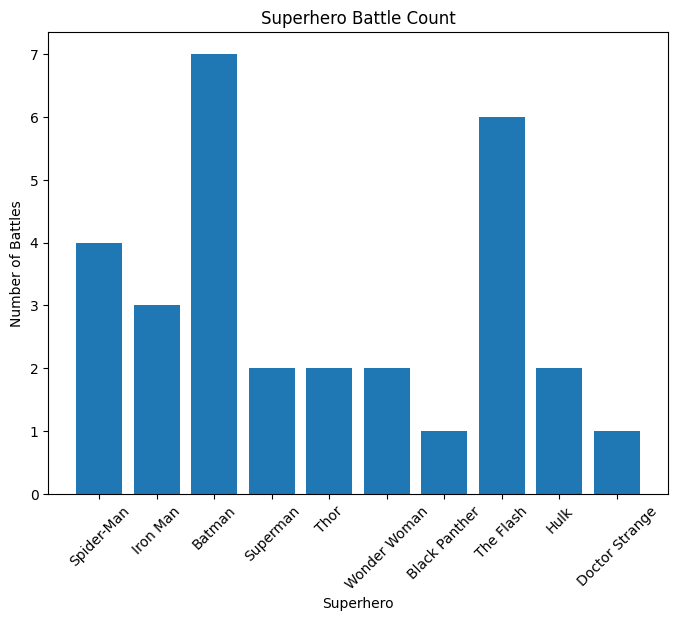

In [8]:
import matplotlib.pyplot as plt
cursor = connection.cursor()

# find the number of battles per hero
cursor.execute("""
    SELECT heroes.name, COUNT(battles.id)
    FROM battles
    JOIN heroes ON battles.hero_id = heroes.id
    GROUP BY battles.hero_id
""")
data = cursor.fetchall()
heroes, battle_count = zip(*data)

plt.figure(figsize=(8, 6))
plt.bar(heroes, battle_count)
plt.xlabel("Superhero")
plt.ylabel("Number of Battles")
plt.title("Superhero Battle Count")
plt.xticks(rotation=45)
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!